# Modeling of Preprocessed Data


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

import pandas as pd

# Load the dataset
file_path = "data/preprocessed_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


# Separate features and target variable
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display performance metrics
classification_rep = classification_report(y_test, y_pred)
accuracy, precision, recall, roc_auc, classification_rep


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          9898 non-null   float64
 1   1          9898 non-null   float64
 2   2          9898 non-null   float64
 3   3          9898 non-null   float64
 4   4          9898 non-null   float64
 5   5          9898 non-null   float64
 6   6          9898 non-null   float64
 7   7          9898 non-null   float64
 8   8          9898 non-null   float64
 9   9          9898 non-null   float64
 10  10         9898 non-null   float64
 11  11         9898 non-null   float64
 12  12         9898 non-null   float64
 13  13         9898 non-null   float64
 14  14         9898 non-null   float64
 15  15         9898 non-null   float64
 16  16         9898 non-null   float64
 17  17         9898 non-null   float64
 18  18         9898 non-null   float64
 19  19         9898 non-null   float64
 20  20      

(0.8873737373737374,
 0.8246656760772659,
 0.8409090909090909,
 np.float64(0.9458195592286501),
 '              precision    recall  f1-score   support\n\n           0       0.92      0.91      0.92      1320\n           1       0.82      0.84      0.83       660\n\n    accuracy                           0.89      1980\n   macro avg       0.87      0.88      0.87      1980\nweighted avg       0.89      0.89      0.89      1980\n')

The logistic regression model achieved the following performance metrics:

- Accuracy: 88.8%
- Precision: 82.5%
- Recall: 84.2%
- ROC-AUC Score: 94.6%

The classification report shows:

- Class 0 (Non-bankrupt companies): 92% precision and 91% recall
- Class 1 (Bankrupt companies): 82% precision and 84% recall

Overall, the model performs well, particularly in distinguishing bankrupt companies with a high recall score, meaning it captures a good proportion of actual bankrupt companies.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Display results
(accuracy_rf, precision_rf, recall_rf, roc_auc_rf, classification_rep_rf), \
(accuracy_xgb, precision_xgb, recall_xgb, roc_auc_xgb, classification_rep_xgb)


c:\Users\chank\vscode\Foundations of ML\MLmidterm\venv2\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:18:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


((0.9782828282828283,
  0.9530102790014684,
  0.9833333333333333,
  np.float64(0.9978139348025712),
  '              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98      1320\n           1       0.95      0.98      0.97       660\n\n    accuracy                           0.98      1980\n   macro avg       0.97      0.98      0.98      1980\nweighted avg       0.98      0.98      0.98      1980\n'),
 (0.9787878787878788,
  0.9478260869565217,
  0.990909090909091,
  np.float64(0.9967263544536271),
  '              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.98      1320\n           1       0.95      0.99      0.97       660\n\n    accuracy                           0.98      1980\n   macro avg       0.97      0.98      0.98      1980\nweighted avg       0.98      0.98      0.98      1980\n'))

## Random Forest Results
- Accuracy: 97.8%
- Precision: 95.3%
- Recall: 98.3%
- ROC-AUC Score: 99.8%
## XGBoost Results
- Accuracy: 97.9%
- Precision: 94.8%
- Recall: 99.1%
- ROC-AUC Score: 99.7%
## Key Takeaways
- XGBoost has a slightly higher recall (99.1%), meaning it detects slightly more bankrupt companies.
- Random Forest has a slightly higher precision (95.3%), meaning it has fewer false positives.
- Both models have nearly identical accuracy (~97.8%-97.9%) and ROC-AUC scores (~99.7%-99.8%), indicating strong discriminatory power.
## What’s Next?
- If your goal is to maximize recall (catch as many bankruptcies as possible), XGBoost is the better choice.
- If you want fewer false alarms (higher precision), Random Forest might be preferable.
- Hyperparameter tuning (e.g., adjusting tree depth, learning rate, and feature importance selection) can further optimize performance.

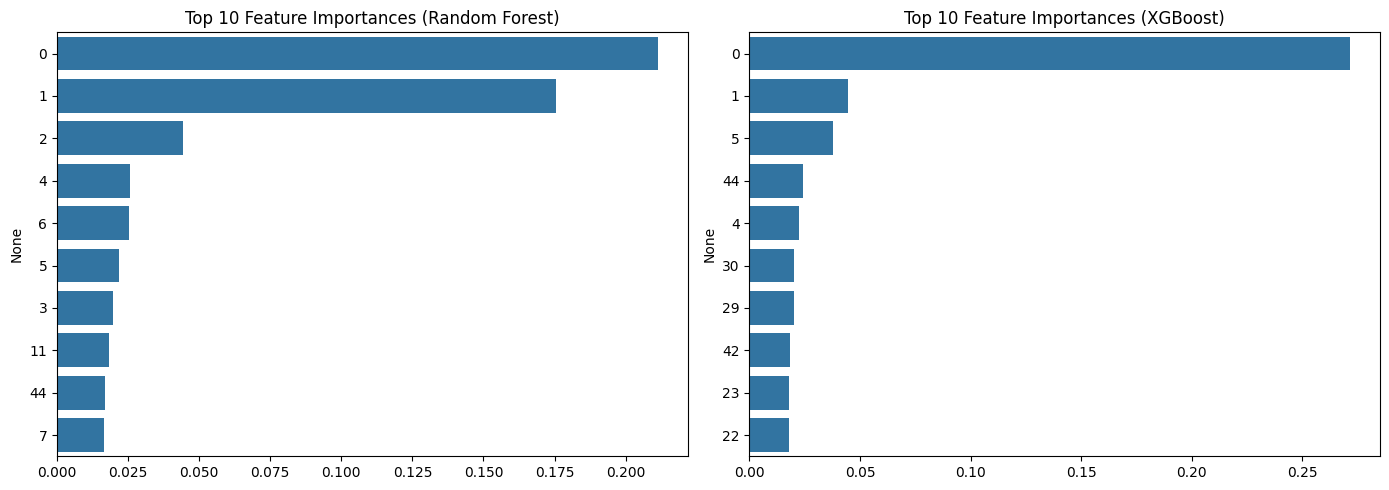

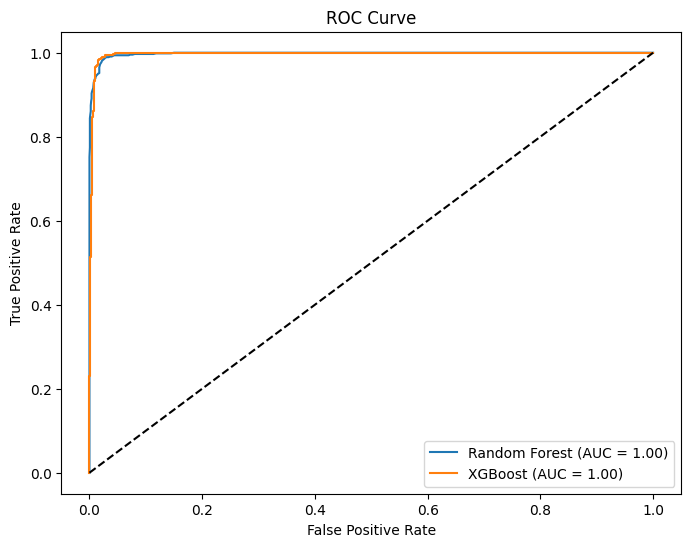

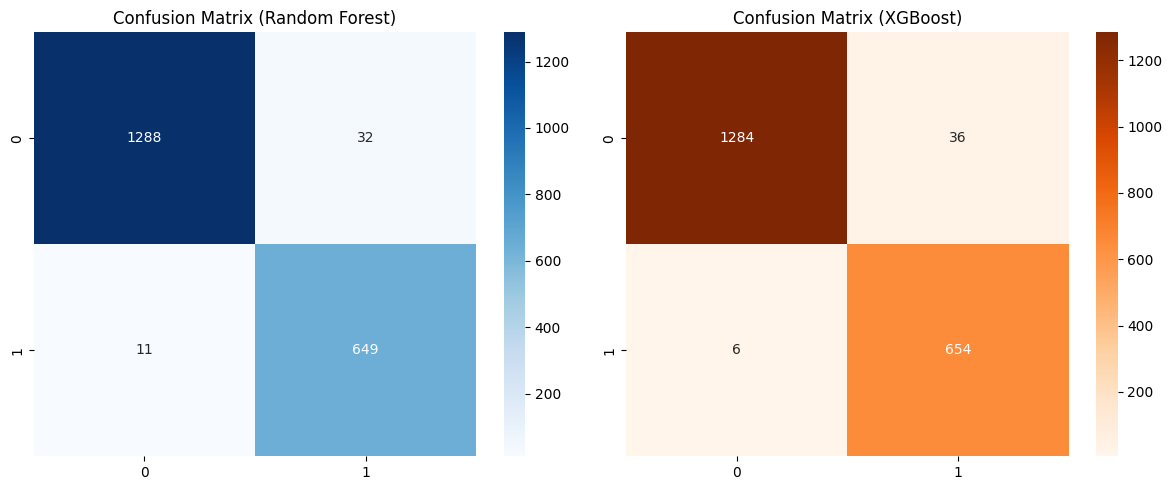

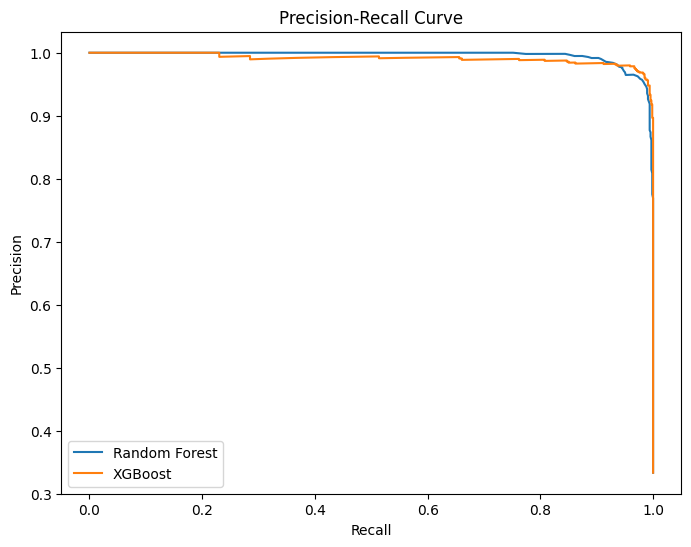

In [3]:
# Re-load the dataset
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns


# Generate feature importance plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
sns.barplot(y=rf_importances.index[:10], x=rf_importances.values[:10], ax=axes[0])
axes[0].set_title("Top 10 Feature Importances (Random Forest)")
sns.barplot(y=xgb_importances.index[:10], x=xgb_importances.values[:10], ax=axes[1])
axes[1].set_title("Top 10 Feature Importances (XGBoost)")

plt.tight_layout()
plt.show()

# Generate ROC Curve
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = {:.2f})".format(auc(fpr_xgb, tpr_xgb)))
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Generate Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Random Forest)")
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix (XGBoost)")
plt.tight_layout()
plt.show()

# Generate Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
plt.plot(recall_rf, precision_rf, label="Random Forest")
plt.plot(recall_xgb, precision_xgb, label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [4]:
import joblib


# Save the trained model
joblib.dump(rf_model, "models/rf.pkl")
joblib.dump(xgb_model, "models/xgb.pkl")




['models/xgb.pkl']